In [1]:
%cd ..
from workflow.processing import *
from workflow.plotting import *

/home/vitchyr/git/universal_value_density_estimation


In [2]:
import plotnine as gg

In [110]:
experiment = Experiment(1, '/home/vitchyr/mnt2/log2/21-02-03-fetch-uvd--first-try/')
# experiment = Experiment(113, '/home/vitchyr/mnt2/log2/21-02-03-dev-uvd/')
df = experiment.record()
experiment

21-02-03-fetch-uvd--first-try

In [111]:
df.columns

Index(['iteration', 'timestamp', 'return', 'env_steps', 'target_fraction',
       'target_q', 'td_loss', 'r_loss', 'mean_r', 'mean_r_with_goal',
       'max_r_with_goal', 'min_r_with_goal', 'actor_loss', 'valid_r_loss',
       'valid_target_r', 'valid_target_v', 'eval_final_success',
       'eval_success_rate', 'eval_final_distance', 'eval_distances',
       'action_norm', 'minute'],
      dtype='object')

/home/vitchyr/anaconda2/envs/vis/lib/python3.6/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 1999580 rows containing missing values.


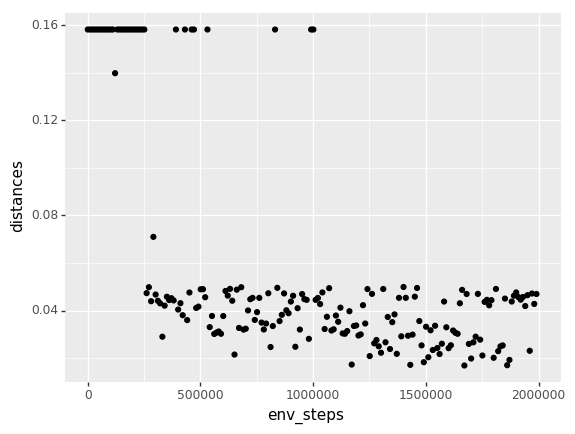

<ggplot: (8794259389718)>

In [113]:
df['distances'] = df['eval_final_distance']
p = (gg.ggplot(df)
     + gg.aes(x='env_steps', y='distances')
    + gg.geom_point()
)
p

In [73]:
df.head()

,iteration,timestamp,return,env_steps,target_fraction,target_q,td_loss,r_loss,mean_r,mean_r_with_goal,...,valid_r_loss,valid_target_r,valid_target_v,eval_final_success,eval_success_rate,eval_distance_to_target_mean,eval_distance_to_target_final,action_norm,minute,distances
0,0,1.612395e+09,NaN,0.0,NaN,NaN,NaN,NaN,None,None,...,None,None,None,0.0,247.0,514.371312,6.994452,0.108022,0.000000,6.994452
1,1,1.612395e+09,NaN,0.0,NaN,NaN,NaN,NaN,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,0.001684,NaN
2,2,1.612395e+09,NaN,0.0,NaN,NaN,NaN,NaN,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,0.003361,NaN
3,3,1.612395e+09,NaN,0.0,NaN,NaN,NaN,NaN,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,0.005037,NaN
4,4,1.612395e+09,NaN,0.0,NaN,NaN,NaN,NaN,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,0.006714,NaN


In [7]:
df['timestamp'].max() - df['timestamp'].min()

61573.33249425888

In [8]:
experiment.config()

batch_size                        512
burnin                          10000
critic_learning_rate           0.0008
density_learning_rate          0.0002
density_replay_size             50000
discount_factor                  0.98
env_name                 FetchPush-v1
exploration_noise                -2.3
min_replay_size                  1000
num_bijectors                       6
num_envs                            1
policy_learning_rate           0.0008
progressive_noise               False
replay_size                   1500000
reward_factor                    0.02
seed                        272706163
sequence_length                     4
shuffle_goals                   False
small_goal                      False
small_goal_size                 0.005
step_limit                          1
target_action_noise                 0
target_update_step               0.01
dtype: object

(0, 1)

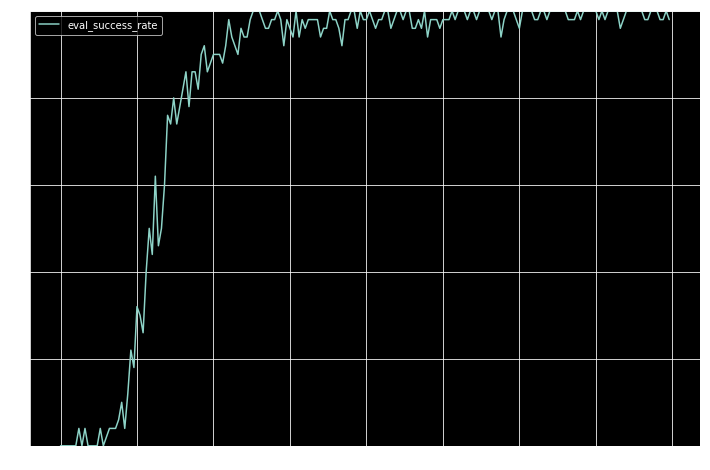

In [9]:
fig = plot_fields(df.dropna(subset=['eval_success_rate']).assign(eval_success_rate=lambda df: df['eval_success_rate']/50), ["eval_success_rate"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1)])
plt.ylim((0, 1))

In [240]:
#df.to_csv("/home/anon/gdrive/GT (Research)/uvd_dfs_params_1/difficult_push_uvd1_3")

In [153]:
def compare_xids(xid1, xid2):
    directory = '/home/anon/sacred_partition/'
    config_1 = Experiment(xid1, directory).config()
    config_2 = Experiment(xid2, directory).config()

    return pd.DataFrame({xid1: config_1, xid2: config_2}).where(config_1 != config_2).dropna()
compare_xids(1, 2)

,1,2
seed,582913489,825864295


In [392]:
experiment.config()

batch_size                         512
burnin                           10000
critic_learning_rate             5e-05
density_learning_rate           0.0002
density_replay_size              50000
discount_factor                   0.98
env_name                 FetchSlide-v1
exploration_noise                 -2.3
min_replay_size                   1000
num_envs                             3
policy_learning_rate             5e-05
progressive_noise                 True
replay_size                    1500000
seed                          81316830
shuffle_goals                    False
small_goal                       False
step_limit                           1
target_action_noise                  0
target_update_step                0.01
dtype: object

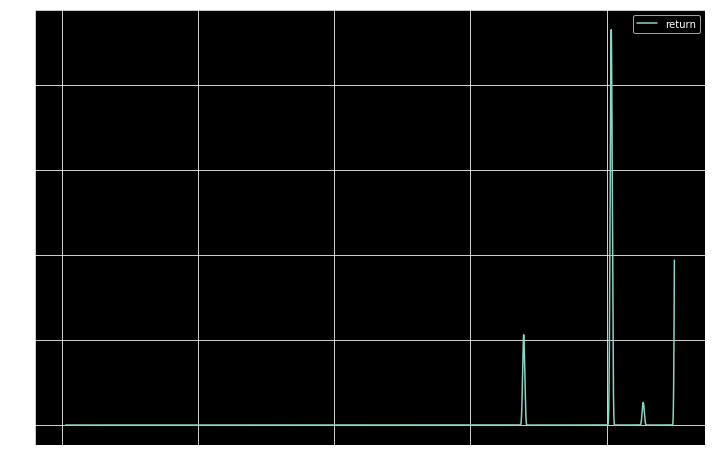

In [102]:
fig = plot_fields(df, ["return"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1000)])

(0, 1)

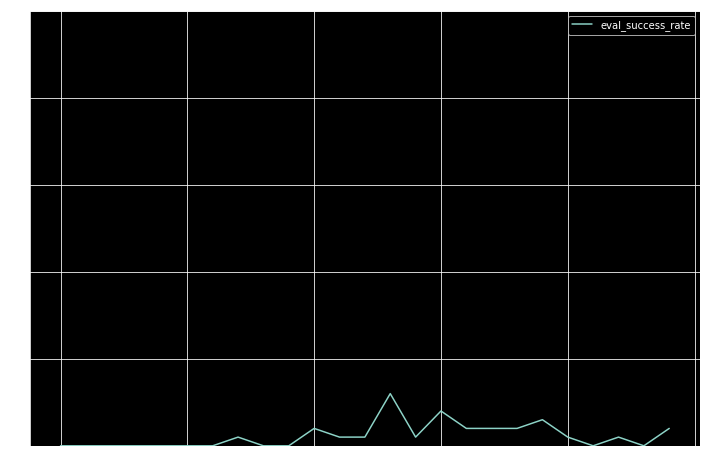

In [249]:
fig = plot_fields(df.dropna(subset=['eval_success_rate']).assign(eval_success_rate=lambda df: df['eval_success_rate']/50), ["eval_success_rate"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1)])
plt.ylim((0, 1))

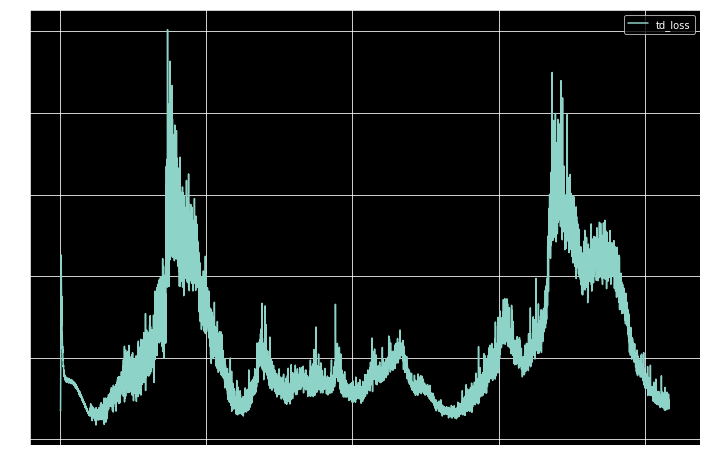

In [131]:
fig = plot_fields(df, ["td_loss"], x='iteration', preprocessors=[smoothen_fields(100)])